# Importing Iibraries

In [20]:
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
sns.set(style="whitegrid", palette="pastel")

# Ioad Data

In [2]:
df = pd.read_csv(r"/content/Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Data Exploration and Cleaning

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df.sample(1)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
143,144,6.8,3.2,5.9,2.3,Iris-virginica


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


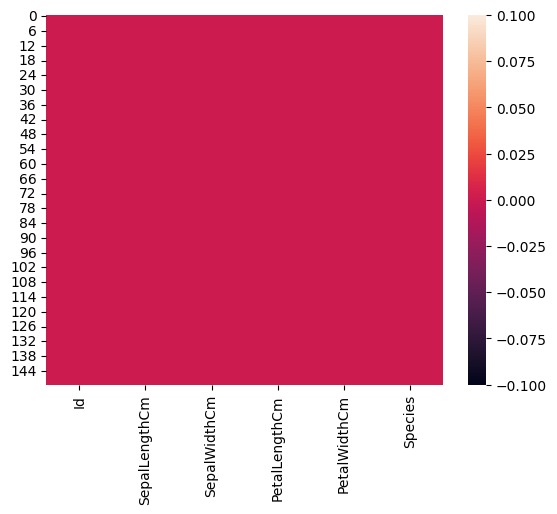

In [11]:
sns.heatmap(df.isnull())
plt.show()

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
numeric_df = df.select_dtypes(include=[np.number])

for column in numeric_df.columns:
    Q1 = numeric_df[column].quantile(0.25)
    Q3 = numeric_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = numeric_df[(numeric_df[column] < lower_bound) | (numeric_df[column] > upper_bound)]
    print(f"{column}: {outliers.shape[0]} outliers")

Id: 0 outliers
SepalLengthCm: 0 outliers
SepalWidthCm: 4 outliers
PetalLengthCm: 0 outliers
PetalWidthCm: 0 outliers


In [15]:
Q1 = df['SepalWidthCm'].quantile(0.25)
Q3 = df['SepalWidthCm'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

median_value = df['SepalWidthCm'].median()

df['SepalWidthCm'] = df['SepalWidthCm'].apply(
    lambda x: median_value if x < lower_bound or x > upper_bound else x
)

df.shape

(150, 6)

# Data Analysis

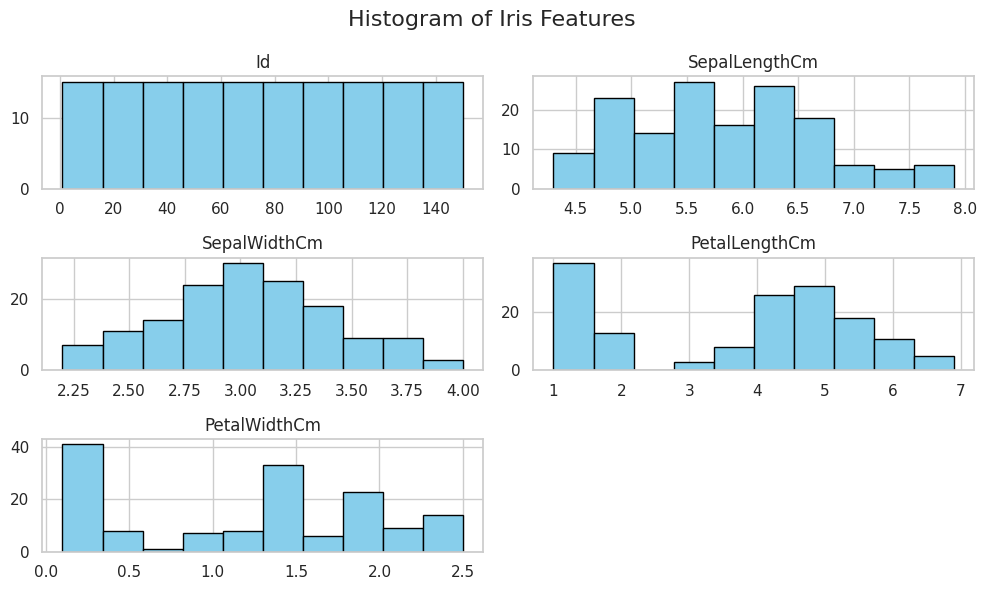

In [21]:
df.drop('Species', axis=1).hist(figsize=(10, 6), color='skyblue', edgecolor='black')
plt.suptitle("Histogram of Iris Features", fontsize=16)
plt.tight_layout()
plt.show()

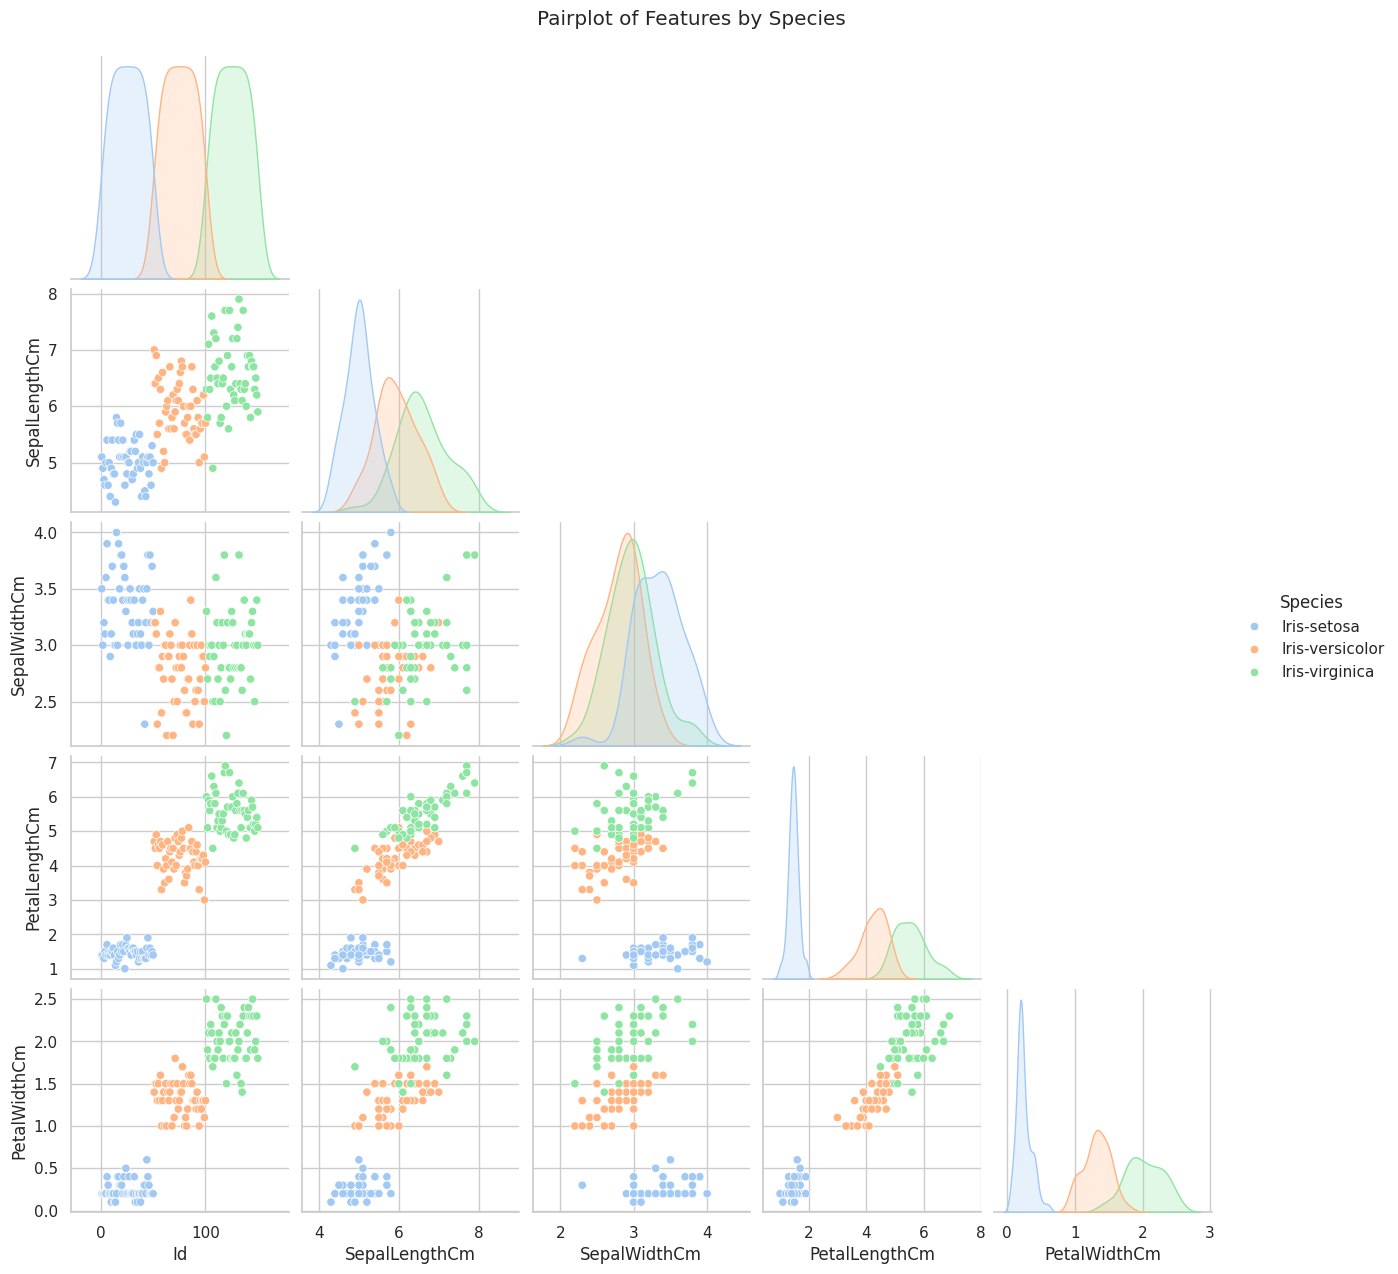

In [25]:
sns.pairplot(df, hue='Species', corner=True)
plt.suptitle("Pairplot of Features by Species", y=1.02)
plt.show()

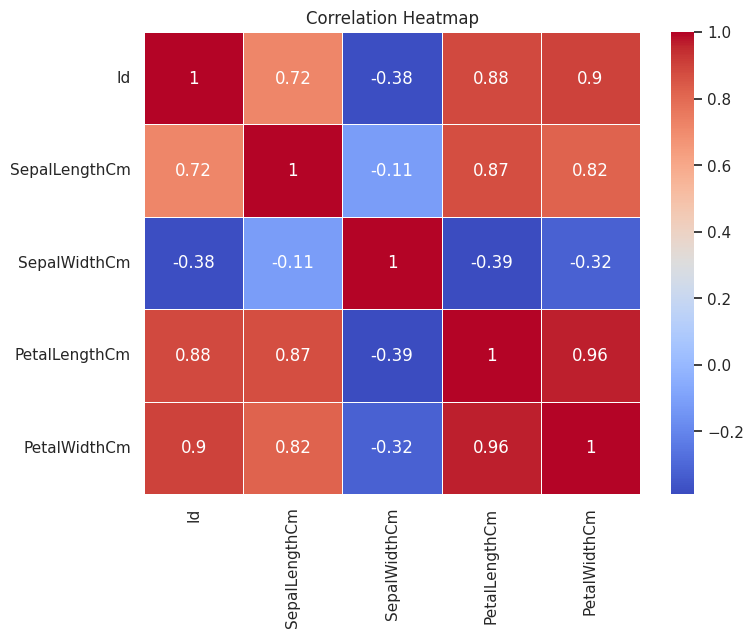

In [26]:
plt.figure(figsize=(8,6))
sns.heatmap(df.drop('Species', axis=1).corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

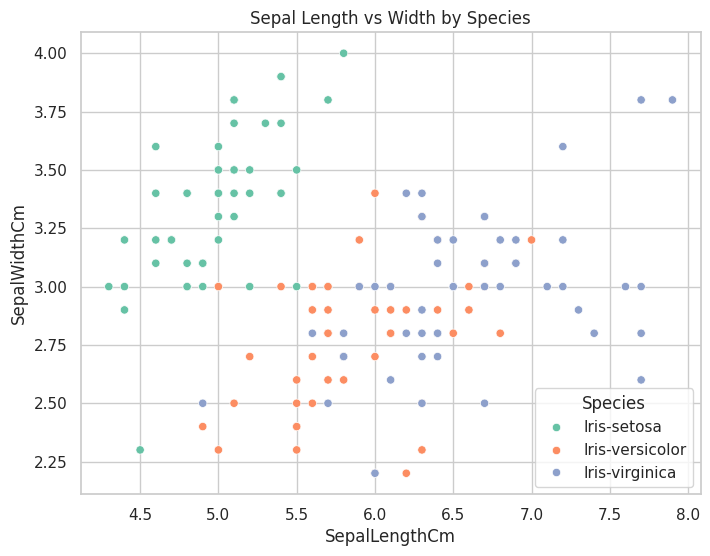

In [28]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species', palette='Set2')
plt.title("Sepal Length vs Width by Species")
plt.show()

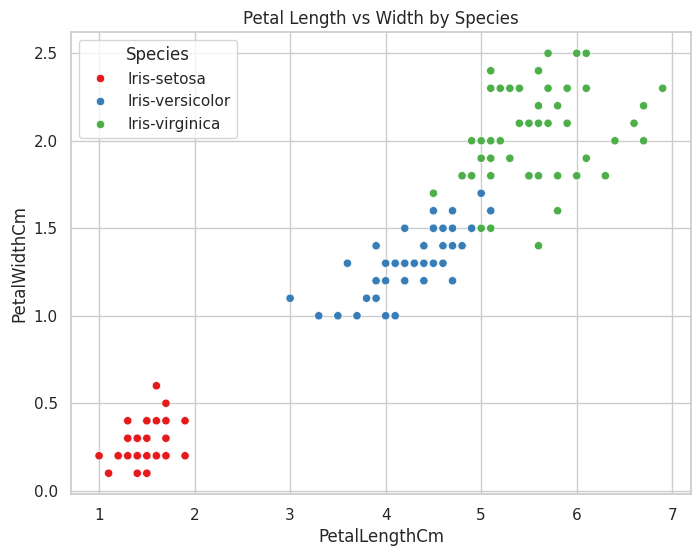

In [29]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PetalLengthCm', y='PetalWidthCm', hue='Species', palette='Set1')
plt.title("Petal Length vs Width by Species")
plt.show()

/tmp/ipython-input-30-553205304.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Species', palette='Set3')


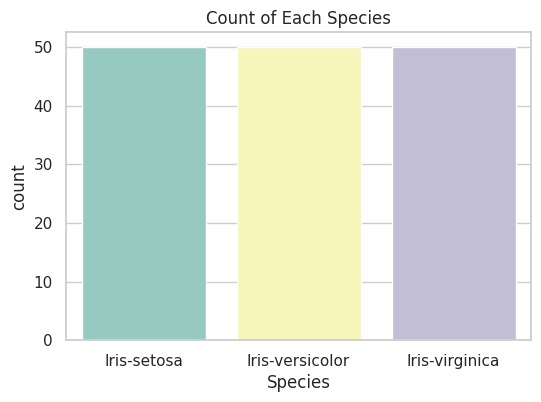

In [30]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Species', palette='Set3')
plt.title("Count of Each Species")
plt.show()

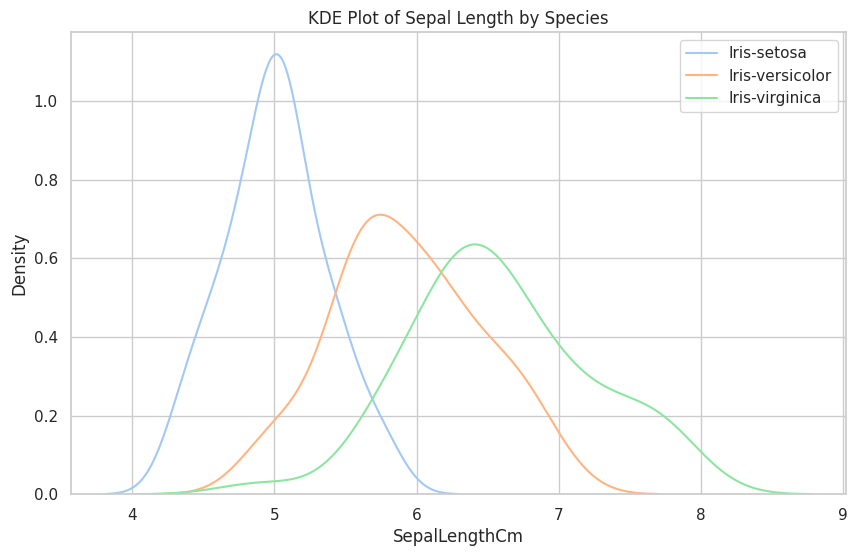

In [31]:
plt.figure(figsize=(10,6))
for species in df['Species'].unique():
    sns.kdeplot(df[df['Species'] == species]['SepalLengthCm'], label=species)
plt.title("KDE Plot of Sepal Length by Species")
plt.legend()
plt.show()

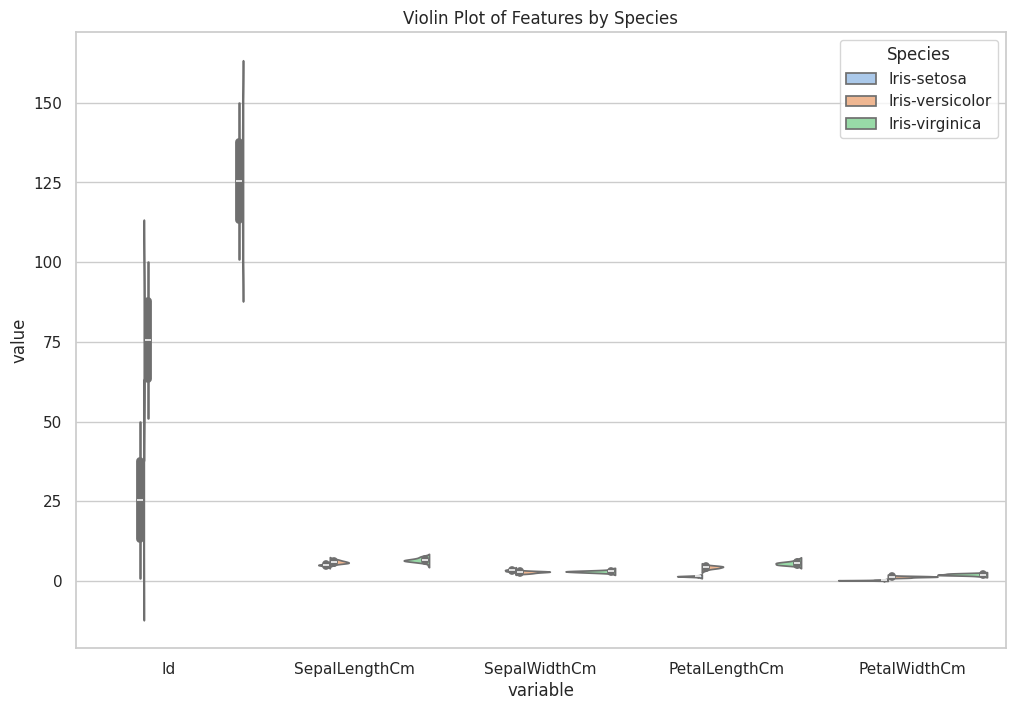

In [32]:
plt.figure(figsize=(12,8))
sns.violinplot(data=pd.melt(df, id_vars="Species"), x="variable", y="value", hue="Species", split=True)
plt.title("Violin Plot of Features by Species")
plt.show()

# Delete Features

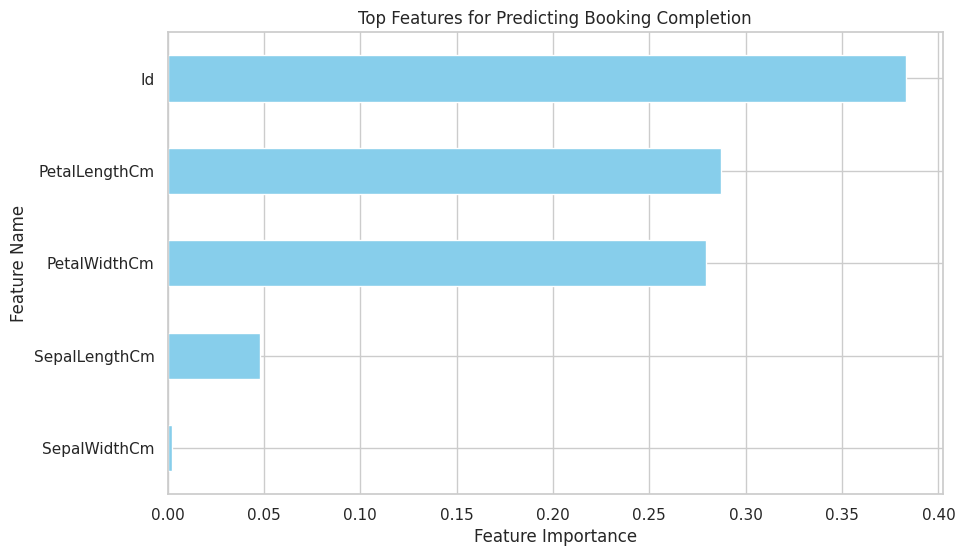

In [34]:
X = df.drop('Species', axis=1)
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y = y

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(10,6))
top_features.plot(kind='barh', color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top Features for Predicting Booking Completion')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.show()

In [36]:
df.drop('SepalWidthCm', axis=1, inplace=True)

In [37]:
df.shape

(150, 5)

# Create Model

In [75]:
df.Species.value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [100]:
X = df.drop('Species', axis=1)
y = df['Species']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,
                           random_state=44,shuffle=True)

In [102]:
model1 = LogisticRegression()
model2 = GaussianNB()
model3 = MLPClassifier()
model4 = RandomForestClassifier()
model5 = DecisionTreeClassifier()
model6 = GradientBoostingClassifier()
model7 = SVC()

In [103]:
accuracies = []

def all(model):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracy = accuracy_score(pred, y_test)
    print("accuracy =",accuracy)
    accuracies.append(accuracy)

all(model1)
all(model2)
all(model3)
all(model4)
all(model5)
all(model6)
all(model7)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy = 1.0
accuracy = 0.9777777777777777


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


accuracy = 0.7777777777777778
accuracy = 1.0
accuracy = 0.9777777777777777
accuracy = 0.9777777777777777
accuracy = 0.9555555555555556


In [104]:
algorithms = ["LogisticRegression","GaussianNB","MLPClassifier","RandomForestClassifier",
              " DecisionTreeClassifier","GradientBoostingClassifier","SVC"]
result = pd.DataFrame({"algorithms":algorithms,"accuracies":accuracies})
result

,algorithms,accuracies
0,LogisticRegression,1.000000
1,GaussianNB,0.977778
2,MLPClassifier,0.777778
3,RandomForestClassifier,1.000000
4,DecisionTreeClassifier,0.977778
5,GradientBoostingClassifier,0.977778
6,SVC,0.955556


In [97]:
done = SVC()
done.fit(X_train, y_train)
pred_y = done.predict(X_test)
pred_y

array(['Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa'],
      dtype=object)

# Metrics

In [105]:
print( done.score(X_test, y_test))
print(done.score(X_train, y_train))

0.9555555555555556
0.9809523809523809


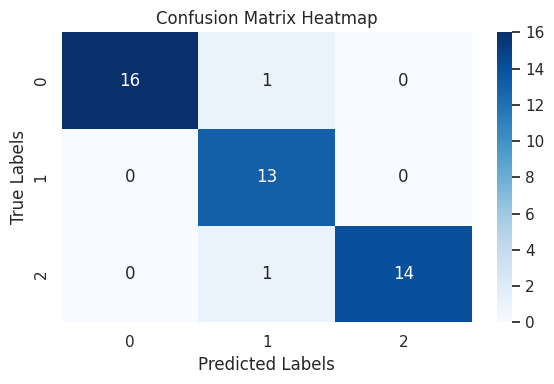

In [106]:
cm = confusion_matrix(y_test, pred_y)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()

In [96]:
cr = classification_report(y_test, pred_y)
print(f'Classification Report: \n{cr}')

Classification Report: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.93      0.97        15

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



# Save Model

In [108]:
import pickle

with open("My model", "wb") as f:
    pickle.dump(done, f)